In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\ottdata.csv")

In [4]:
data.head()


,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [5]:
data['major_sports_event'] = data['major_sports_event'].astype('category')

In [6]:
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [7]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [8]:
data.describe(exclude=np.number).T

,count,unique,top,freq
major_sports_event,1000,2,0,600
genre,1000,8,Others,255
dayofweek,1000,7,Friday,369
season,1000,4,Winter,257


# Univariate Analysis

## 1. Distribution of First-Day Content View

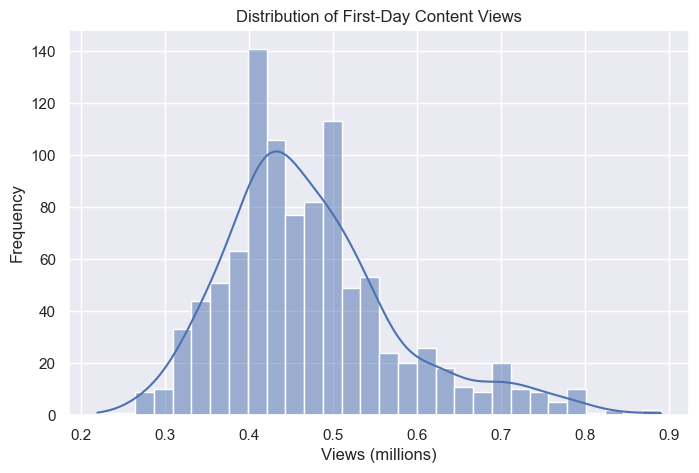

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['views_content'], bins=30, kde=True)
plt.title("Distribution of First-Day Content Views")
plt.xlabel("Views (millions)")
plt.ylabel("Frequency")
plt.show()


## 2. Distribution of Trailer Views 

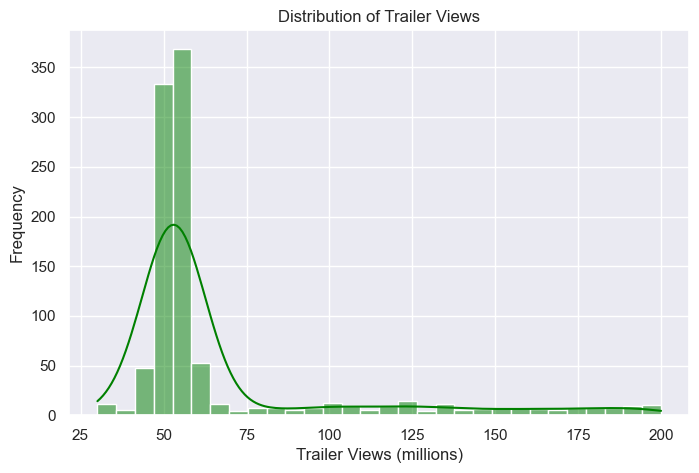

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data['views_trailer'], bins=30, kde=True, color="green")
plt.title("Distribution of Trailer Views")
plt.xlabel("Trailer Views (millions)")
plt.ylabel("Frequency")
plt.show()


## 3. Distribution of Advertisement Impressions

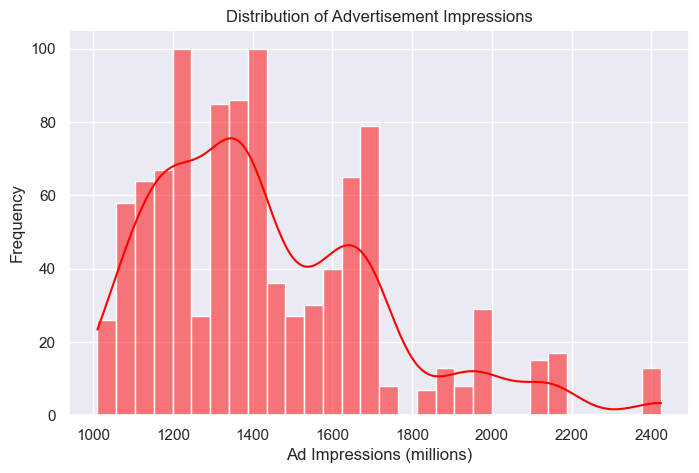

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data['ad_impressions'], bins=30, kde=True, color="red")
plt.title("Distribution of Advertisement Impressions")
plt.xlabel("Ad Impressions (millions)")
plt.ylabel("Frequency")
plt.show()


## 4. Distribution of Platform Visitors

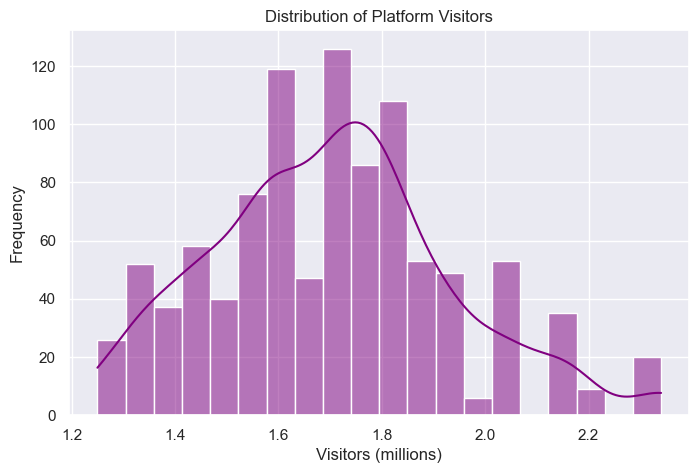

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data['visitors'], bins=20, kde=True, color="purple")
plt.title("Distribution of Platform Visitors")
plt.xlabel("Visitors (millions)")
plt.ylabel("Frequency")
plt.show()


## 5. Genre Distribution

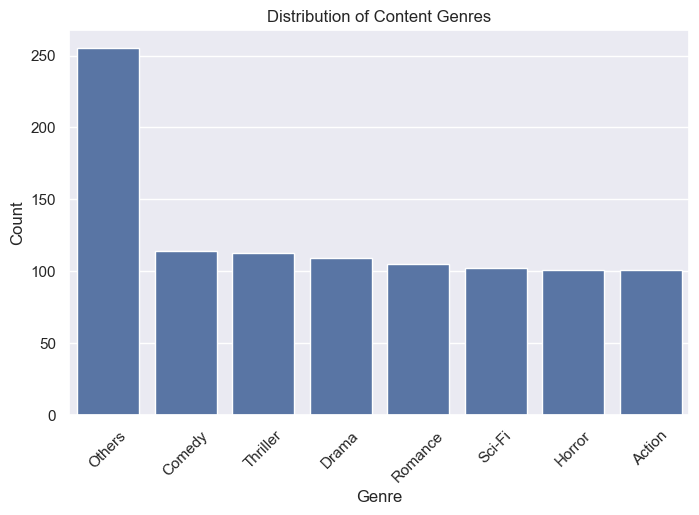

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='genre', data=data, order=data['genre'].value_counts().index)
plt.title("Distribution of Content Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## 6. Distribution of Content Release Days

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\2379602444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dayofweek', data=data, order=data['dayofweek'].value_counts().index, palette="Oranges")


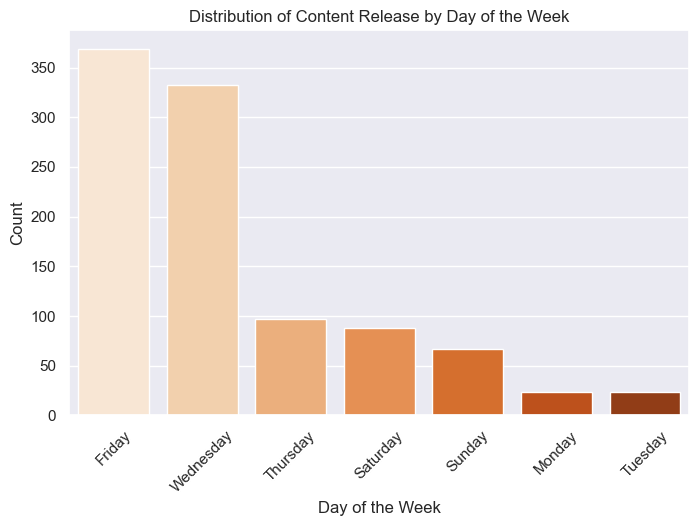

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='dayofweek', data=data, order=data['dayofweek'].value_counts().index, palette="Oranges")
plt.title("Distribution of Content Release by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## 7. Content Release by Season

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\1397392594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=data, order=data['season'].value_counts().index, palette="magma")


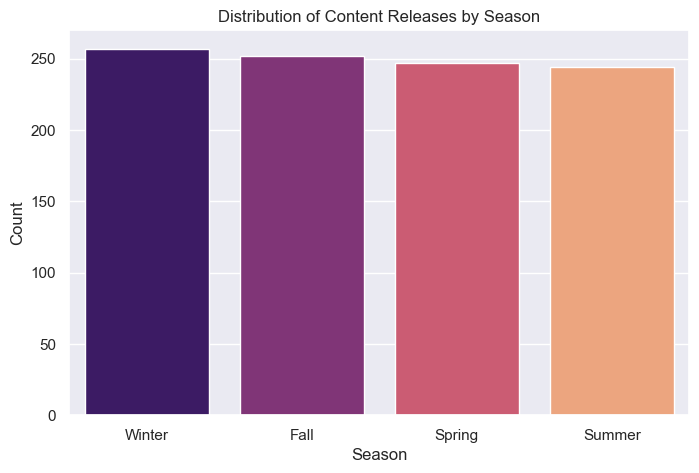

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='season', data=data, order=data['season'].value_counts().index, palette="magma")
plt.title("Distribution of Content Releases by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


## 8. Effect of Major Sports Events 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\427188147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='major_sports_event', data=data, palette="Set1")


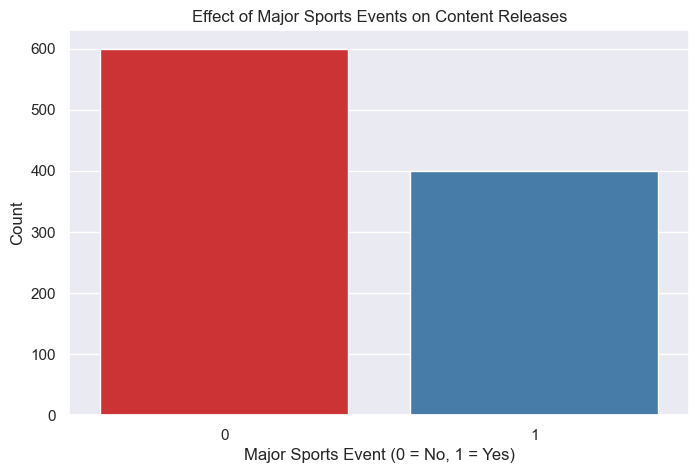

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='major_sports_event', data=data, palette="Set1")
plt.title("Effect of Major Sports Events on Content Releases")
plt.xlabel("Major Sports Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


# Bivariate Analysis

## 1. Correlation Between Trailer Views and First-Day Content Views

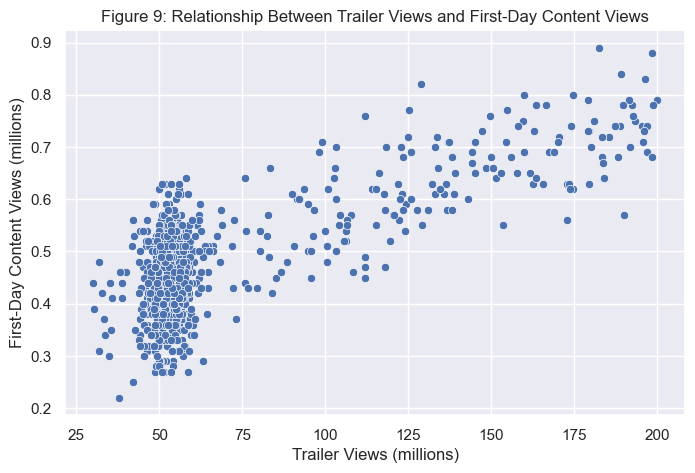

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='views_trailer', y='views_content', data=data)
plt.title("Figure 9: Relationship Between Trailer Views and First-Day Content Views")
plt.xlabel("Trailer Views (millions)")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


## 2. Effect of Advertisement Impressions on First-Day Content Views

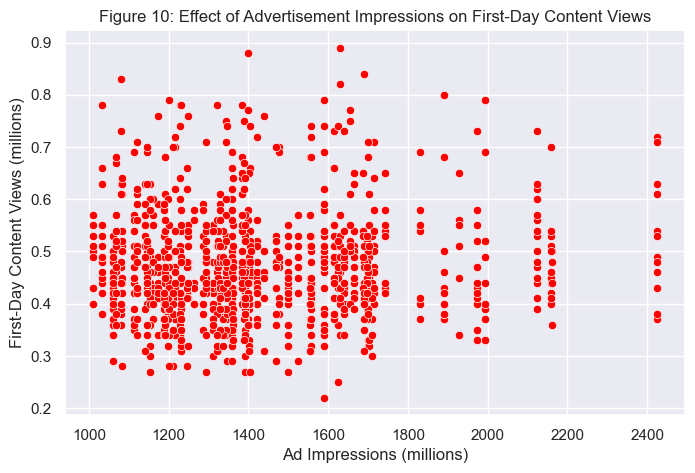

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ad_impressions', y='views_content', data=data, color="red")
plt.title("Figure 10: Effect of Advertisement Impressions on First-Day Content Views")
plt.xlabel("Ad Impressions (millions)")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


## 3. Impact of Platform Visitors on First-Day Content Views

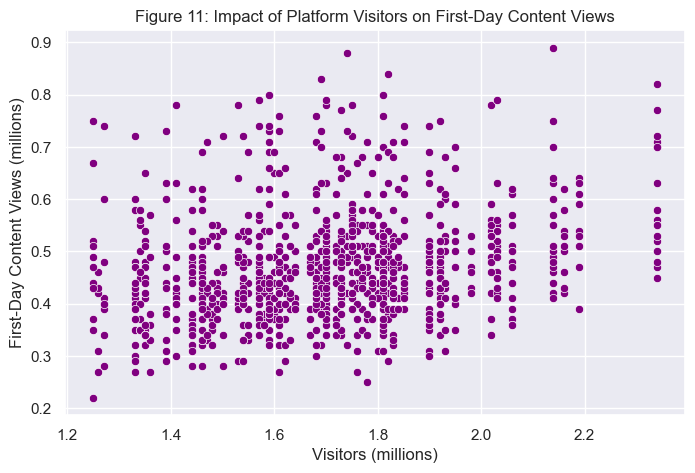

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='visitors', y='views_content', data=data, color="purple")
plt.title("Figure 11: Impact of Platform Visitors on First-Day Content Views")
plt.xlabel("Visitors (millions)")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


## 4. Impact of Day of Release on First-Day Content Views 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\4161927661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='views_content', data=data, palette="coolwarm")


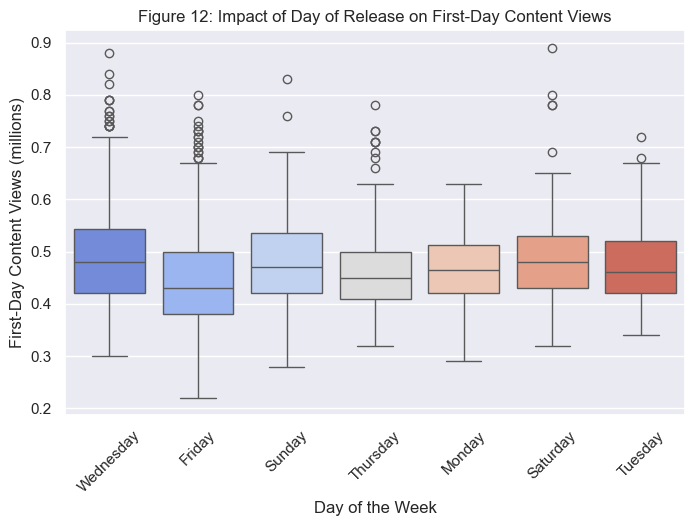

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dayofweek', y='views_content', data=data, palette="coolwarm")
plt.title("Figure 12: Impact of Day of Release on First-Day Content Views")
plt.xlabel("Day of the Week")
plt.ylabel("First-Day Content Views (millions)")
plt.xticks(rotation=45)
plt.show()


## 5. Seasonal Trends in First-Day Content Views 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\3180047216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='views_content', data=data, palette="magma")


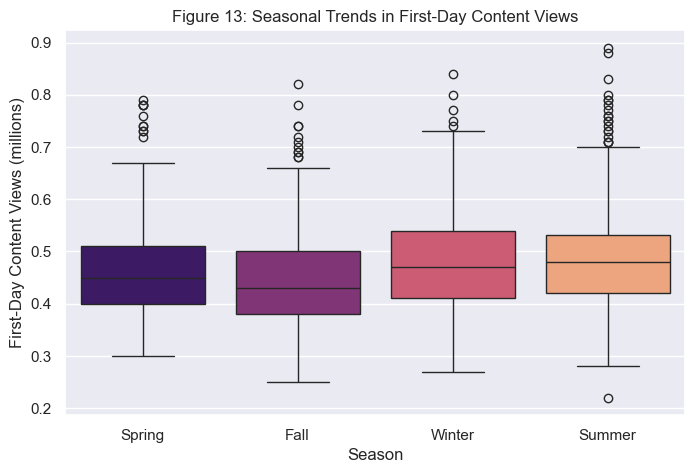

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='views_content', data=data, palette="magma")
plt.title("Figure 13: Seasonal Trends in First-Day Content Views")
plt.xlabel("Season")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


## 6. Effect of Major Sports Events on First-Day Content Views

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\681110662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='major_sports_event', y='views_content', data=data, palette="Set1")


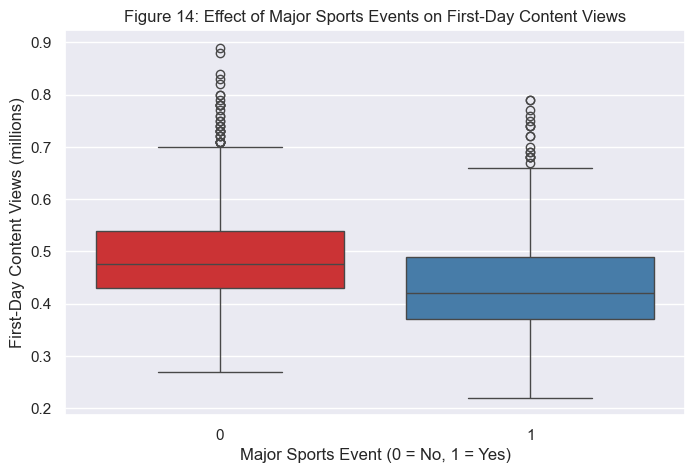

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='major_sports_event', y='views_content', data=data, palette="Set1")
plt.title("Figure 14: Effect of Major Sports Events on First-Day Content Views")
plt.xlabel("Major Sports Event (0 = No, 1 = Yes)")
plt.ylabel("First-Day Content Views (millions)")
plt.show()



## 7. Relationship Between Genre and First-Day Content Views

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\3974753384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='views_content', data=data, palette="viridis")


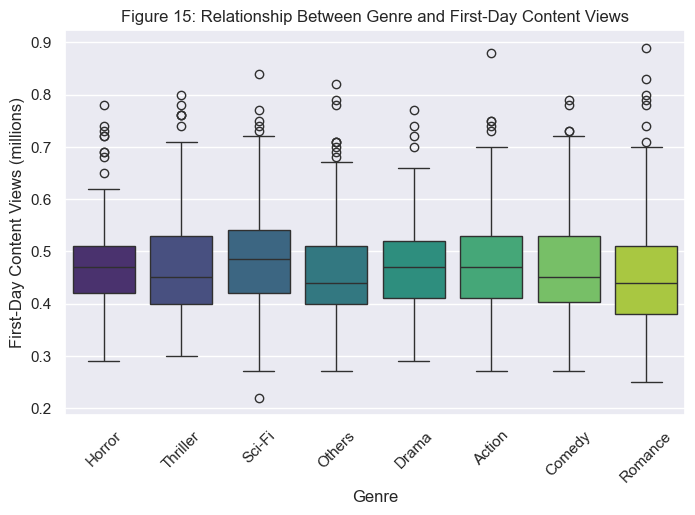

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='genre', y='views_content', data=data, palette="viridis")
plt.title("Figure 15: Relationship Between Genre and First-Day Content Views")
plt.xlabel("Genre")
plt.ylabel("First-Day Content Views (millions)")
plt.xticks(rotation=45)
plt.show()


## 8.Correlation Heatmap of Key Variables

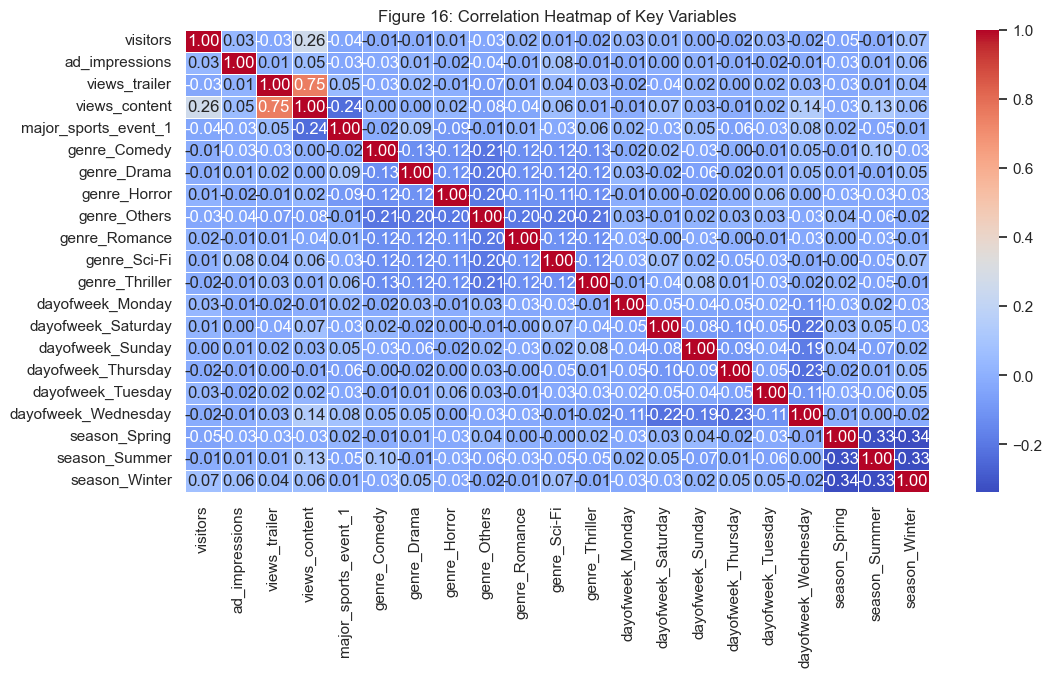

In [24]:
# Convert categorical columns into numerical format
data_encoded = pd.get_dummies(data, drop_first=True)  # One-hot encoding for categorical variables

# Plot the correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Figure 16: Correlation Heatmap of Key Variables")
plt.show()


# 1. What does the distribution of content views look like?

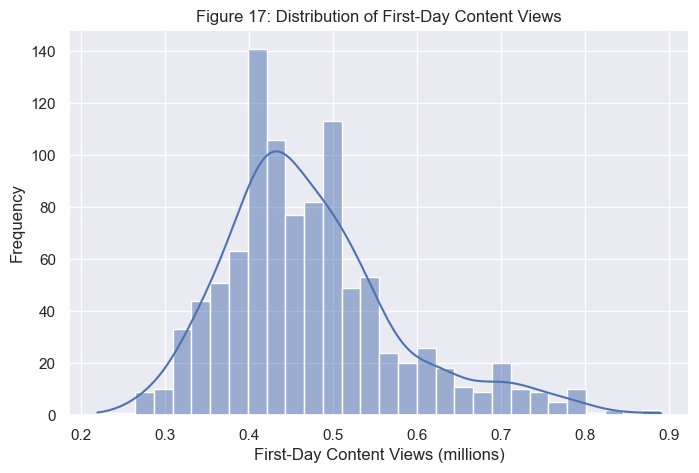

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data['views_content'], bins=30, kde=True)
plt.title("Figure 17: Distribution of First-Day Content Views")
plt.xlabel("First-Day Content Views (millions)")
plt.ylabel("Frequency")
plt.show()


# 2. What does the distribution of genres look like? 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\3238838510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=data, order=data['genre'].value_counts().index, palette="coolwarm")


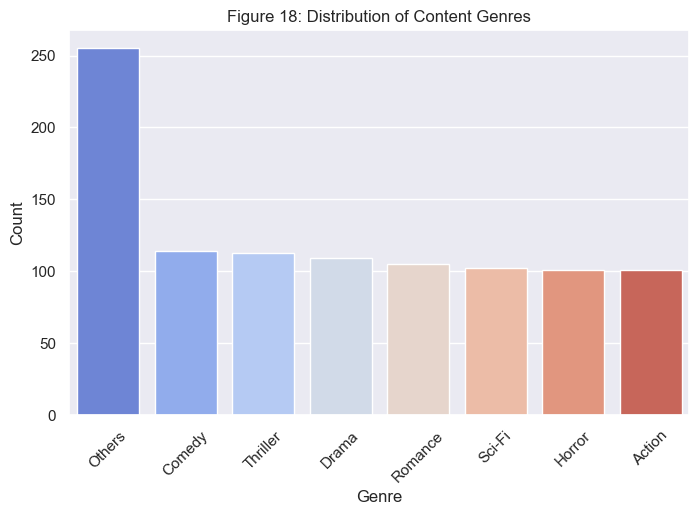

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='genre', data=data, order=data['genre'].value_counts().index, palette="coolwarm")
plt.title("Figure 18: Distribution of Content Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# 3.The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\4010417257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='views_content', data=data, palette="coolwarm")


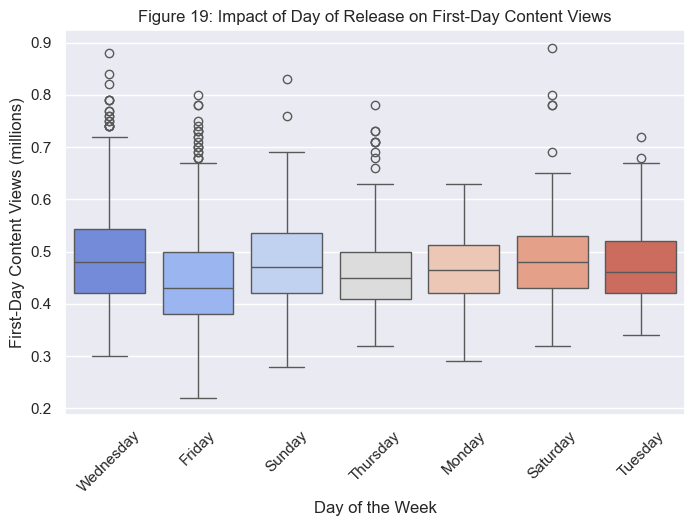

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dayofweek', y='views_content', data=data, palette="coolwarm")
plt.title("Figure 19: Impact of Day of Release on First-Day Content Views")
plt.xlabel("Day of the Week")
plt.ylabel("First-Day Content Views (millions)")
plt.xticks(rotation=45)
plt.show()


In [28]:
avg_views_per_day = data.groupby("dayofweek")["views_content"].mean().sort_values(ascending=False)
print("Average First-Day Content Views by Day of Release:\n", avg_views_per_day)


Average First-Day Content Views by Day of Release:
 dayofweek
Saturday     0.497955
Wednesday    0.494608
Tuesday      0.487826
Sunday       0.484179
Thursday     0.470619
Monday       0.467917
Friday       0.446694
Name: views_content, dtype: float64


# 4.How does the viewership vary with the season of release?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23680\891228191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='views_content', data=data, palette="magma")


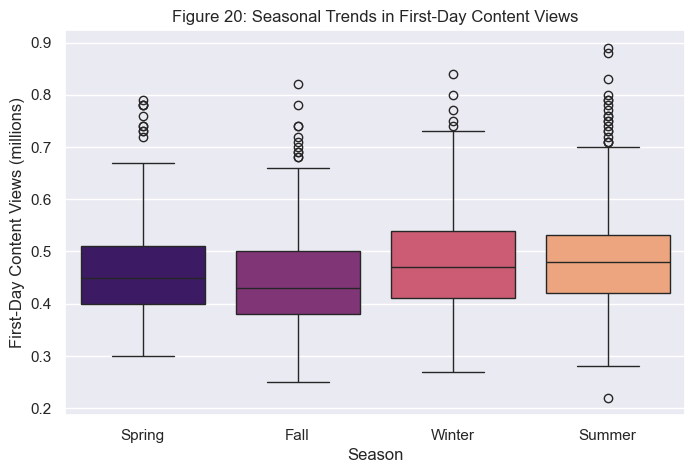

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='views_content', data=data, palette="magma")
plt.title("Figure 20: Seasonal Trends in First-Day Content Views")
plt.xlabel("Season")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


# 5.What is the correlation between trailer views and content views? 

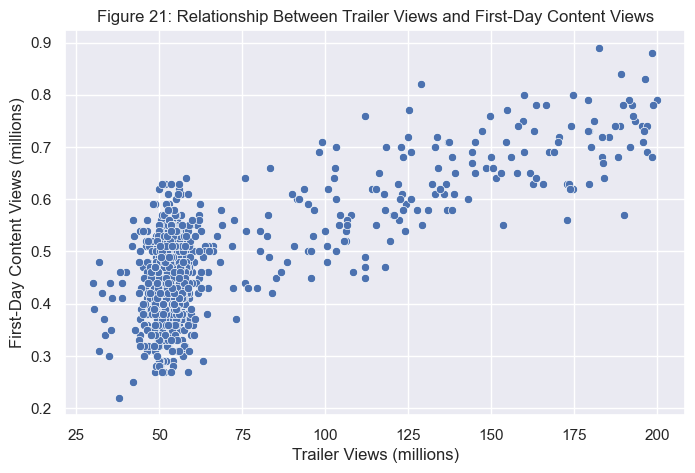

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='views_trailer', y='views_content', data=data)
plt.title("Figure 21: Relationship Between Trailer Views and First-Day Content Views")
plt.xlabel("Trailer Views (millions)")
plt.ylabel("First-Day Content Views (millions)")
plt.show()


In [31]:
correlation = data['views_trailer'].corr(data['views_content'])
print(f"Correlation between Trailer Views and First-Day Content Views: {correlation:.2f}")


Correlation between Trailer Views and First-Day Content Views: 0.75


# 1.Duplicates value check

In [32]:

duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

data = data.drop_duplicates()
print("Duplicates removed.")


Number of duplicate rows: 0
Duplicates removed.


# 2. Missing Value Treatment 

In [33]:

missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

num_cols = data.select_dtypes(include=['number']).columns
data.loc[:, num_cols] = data[num_cols].fillna(data[num_cols].median())


cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    data.loc[:, col] = data[col].fillna(data[col].mode()[0])

print("Missing values have been treated successfully.")


Missing values per column:
 visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64
Missing values have been treated successfully.


# 3. Outlier Detection & Treatment (Using IQR Method) 

In [34]:

num_cols = data.select_dtypes(include=['number']).columns

Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1  


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data = data[~((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).any(axis=1)]

print("Outliers removed successfully.")


Outliers removed successfully.


# 4. Feature Engineering 

In [35]:

categorical_cols = ['genre', 'dayofweek', 'season', 'major_sports_event']

existing_categorical_cols = [col for col in categorical_cols if col in data.columns]

if existing_categorical_cols:
   
    data = pd.get_dummies(data, columns=existing_categorical_cols, drop_first=True)
    print("Categorical variables successfully encoded.")
else:
    print("No categorical columns found for encoding.")


Categorical variables successfully encoded.


# 5.Data Preparation for Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data['views_content']  
X = data.drop(columns=['views_content'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"Training Set: {X_train.shape[0]} rows, {X_train.shape[1]} features")
print(f"Testing Set: {X_test.shape[0]} rows, {X_test.shape[1]} features")
print("Data preparation completed successfully. Ready for modeling!")


Training Set: 550 rows, 20 features
Testing Set: 237 rows, 20 features
Data preparation completed successfully. Ready for modeling!


 # 1.Build the Linear Regression Model (Ordinary Least Squares - OLS)

In [37]:

# Ensure indices are aligned by resetting index
X_train_const = sm.add_constant(X_train).reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Fit the model using OLS
model = sm.OLS(y_train_reset, X_train_const).fit()

# Display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     28.13
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           3.32e-70
Time:                        11:53:13   Log-Likelihood:                 882.38
No. Observations:                 550   AIC:                            -1723.
Df Residuals:                     529   BIC:                            -1632.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4381 

# 2.Display Model Coefficients with Feature Names

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})

print(coefficients.sort_values(by='Coefficient', ascending=False))


                 Feature  Coefficient
0               visitors     0.025388
15   dayofweek_Wednesday     0.021369
17         season_Summer     0.021185
11    dayofweek_Saturday     0.013899
16         season_Spring     0.012170
2          views_trailer     0.011018
18         season_Winter     0.010974
12      dayofweek_Sunday     0.007131
8           genre_Sci-Fi     0.004892
13    dayofweek_Thursday     0.004832
10      dayofweek_Monday     0.004383
9         genre_Thriller     0.002862
14     dayofweek_Tuesday     0.002757
1         ad_impressions     0.001907
5           genre_Horror     0.000973
6           genre_Others     0.000729
3           genre_Comedy     0.000340
4            genre_Drama     0.000128
7          genre_Romance    -0.004688
19  major_sports_event_1    -0.028863


# 1.Perform tests for the assumptions of the linear regression

In [39]:

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                 Feature       VIF
6           genre_Others  2.948629
9         genre_Thriller  2.126480
3           genre_Comedy  2.115502
5           genre_Horror  2.085859
4            genre_Drama  1.953518
7          genre_Romance  1.870321
8           genre_Sci-Fi  1.848421
17         season_Summer  1.585529
18         season_Winter  1.576416
16         season_Spring  1.535295
15   dayofweek_Wednesday  1.303809
13    dayofweek_Thursday  1.188716
11    dayofweek_Saturday  1.155962
12      dayofweek_Sunday  1.140260
14     dayofweek_Tuesday  1.062166
19  major_sports_event_1  1.055638
10      dayofweek_Monday  1.055203
2          views_trailer  1.040354
1         ad_impressions  1.024651
0               visitors  1.015898


# 2.Normality of Residuals (Shapiro-Wilk Test & QQ Plot)

In [46]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Residuals follow a normal distribution (Fail to Reject H0)")
else:
    print("Residuals are not normally distributed (Reject H0) - Consider transformation")


Residuals follow a normal distribution (Fail to Reject H0)


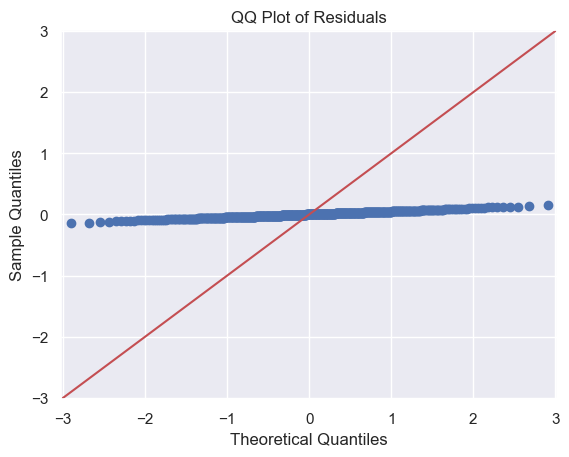

In [47]:

sm.qqplot(residuals, line="45")
plt.title("QQ Plot of Residuals")
plt.show()


# 3. Homoscedasticity Check 

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)

p_value_bp = bp_test[1]

if p_value_bp > 0.05:
    print("Homoscedasticity is present (Fail to Reject H0)")
else:
    print("Heteroscedasticity detected (Reject H0) - Consider transformations")


Homoscedasticity is present (Fail to Reject H0)


# Residual Plot (Visual Check for Homoscedasticit

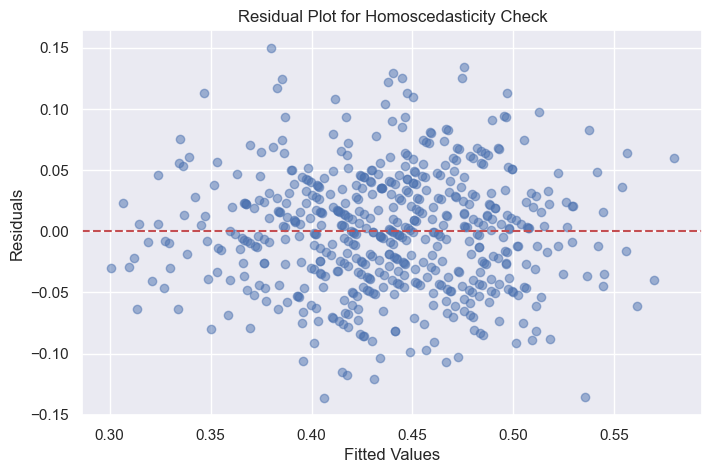

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.show()


#  Linearity Check 

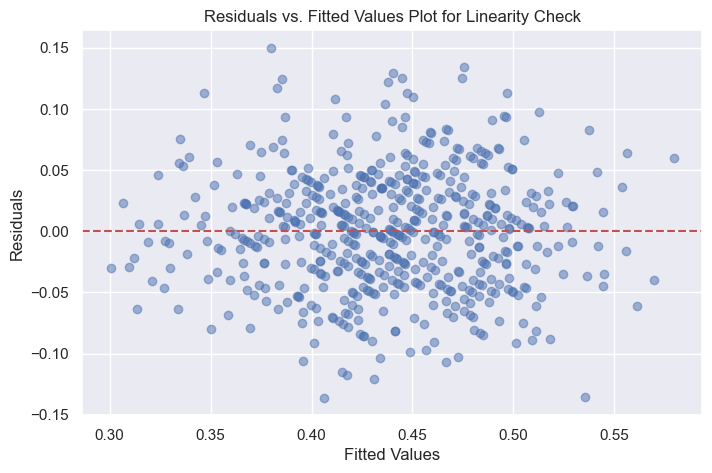

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot for Linearity Check")
plt.show()


# Model performance evaluation
## Evaluate the model on different performance metrics

In [53]:
r2 = model.rsquared
r2_adj = model.rsquared_adj

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")


R-squared: 0.5154
Adjusted R-squared: 0.4971


In [64]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [67]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = model.rsquared
print(f"R-squared: {r2:.4f}")

r2_adj = model.rsquared_adj
print(f"Adjusted R-squared: {r2_adj:.4f}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.0400
Mean Squared Error (MSE): 0.0026
Root Mean Squared Error (RMSE): 0.0507
R-squared: 0.5154
Adjusted R-squared: 0.4971
Mean Absolute Percentage Error (MAPE): 13.95%


Shapiro-Wilk Test p-value: 0.6454
Residuals follow a normal distribution (Fail to Reject H0)


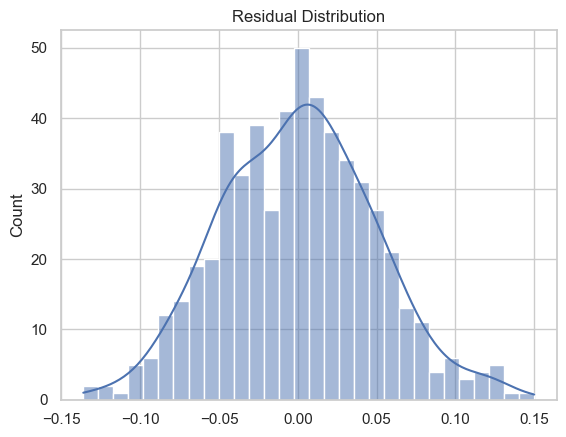

In [58]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

stat, p_value = shapiro(model.resid)
print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Residuals follow a normal distribution (Fail to Reject H0)")
else:
    print("Residuals are not normally distributed (Reject H0) - Consider transformation")

sns.set(style="whitegrid")
sns.histplot(model.resid, kde=True, bins=30)
plt.title("Residual Distribution")
plt.show()


# Actionable Insights & Recommendations
## Comments on significance of predictors 

In [75]:

from statsmodels.stats.outliers_influence import variance_inflation_factor  


model_summary = model.summary()

summary_df = pd.DataFrame(model_summary.tables[1].data)

summary_df.columns = ['Predictor', 'coef', 'std_err', 't', 'P>|t|', '[-0.025', '0.025]']
summary_df.set_index('Predictor', inplace=True)

print(summary_df)

summary_df['coef'] = pd.to_numeric(summary_df['coef'], errors='coerce')
summary_df['P>|t|'] = pd.to_numeric(summary_df['P>|t|'], errors='coerce')

significant_predictors = summary_df[summary_df['P>|t|'] < 0.05]

print("\nSignificant Predictors:")
print(significant_predictors[['coef', 'P>|t|']])

for predictor in significant_predictors.index:
    coef = significant_predictors.loc[predictor, 'coef']
    p_value = significant_predictors.loc[predictor, 'P>|t|']

    if pd.notna(coef) and pd.notna(p_value):
        print(f"\nPredictor: {predictor}")
        print(f"Coefficient: {coef:.4f} (p-value: {p_value:.4f})")

        if coef > 0:
            print("Interpretation: A one-unit increase in this predictor is associated with an increase in the target variable.")
        else:
            print("Interpretation: A one-unit increase in this predictor is associated with a decrease in the target variable.")
    else:
        print(f"\nPredictor: {predictor} has non-numeric values.")

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_data = calculate_vif(X_train)

print("\nMulticollinearity Check (VIF):")
print(vif_data[vif_data['VIF'] < 5])  


                            coef    std_err          t   P>|t|    [-0.025  \
Predictor                                                                   
                            coef    std err          t   P>|t|     [0.025   
const                     0.4381      0.002    207.140   0.000      0.434   
visitors                  0.0254      0.002     11.910   0.000      0.021   
ad_impressions            0.0019      0.002      0.891   0.373     -0.002   
views_trailer             0.0110      0.002      5.108   0.000      0.007   
genre_Comedy              0.0003      0.003      0.110   0.912     -0.006   
genre_Drama               0.0001      0.003      0.043   0.965     -0.006   
genre_Horror              0.0010      0.003      0.318   0.750     -0.005   
genre_Others              0.0007      0.004      0.201   0.841     -0.006   
genre_Romance            -0.0047      0.003     -1.621   0.106     -0.010   
genre_Sci-Fi              0.0049      0.003      1.702   0.089     -0.001   